In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: Futur

In [2]:
df=pd.read_csv('nationwide.csv',sep='[;]')

C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
df

,"""age","""""job""""","""""marital""""","""""education""""","""""default""""","""""balance""""","""""housing""""","""""loan""""","""""contact""""","""""day""""","""""month""""","""""duration""""","""""campaign""""","""""pdays""""","""""previous""""","""""poutcome""""","""""y"""""""
0,"""58","""""management""""","""""married""""","""""tertiary""""","""""no""""",2143,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",261,1,-1,0,"""""unknown""""","""""no"""""""
1,"""44","""""technician""""","""""single""""","""""secondary""""","""""no""""",29,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",151,1,-1,0,"""""unknown""""","""""no"""""""
2,"""33","""""entrepreneur""""","""""married""""","""""secondary""""","""""no""""",2,"""""yes""""","""""yes""""","""""unknown""""",5,"""""may""""",76,1,-1,0,"""""unknown""""","""""no"""""""
3,"""47","""""blue-collar""""","""""married""""","""""unknown""""","""""no""""",1506,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",92,1,-1,0,"""""unknown""""","""""no"""""""
4,"""33","""""unknown""""","""""single""""","""""unknown""""","""""no""""",1,"""""no""""","""""no""""","""""unknown""""",5,"""""may""""",198,1,-1,0,"""""unknown""""","""""no"""""""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,"""51","""""technician""""","""""married""""","""""tertiary""""","""""no""""",825,"""""no""""","""""no""""","""""cellular""""",17,"""""nov""""",977,3,-1,0,"""""unknown""""","""""yes"""""""
45207,"""71","""""retired""""","""""divorced""""","""""primary""""","""""no""""",1729,"""""no""""","""""no""""","""""cellular""""",17,"""""nov""""",456,2,-1,0,"""""unknown""""","""""yes"""""""
45208,"""72","""""retired""""","""""married""""","""""secondary""""","""""no""""",5715,"""""no""""","""""no""""","""""cellular""""",17,"""""nov""""",1127,5,184,3,"""""success""""","""""yes"""""""
45209,"""57","""""blue-collar""""","""""married""""","""""secondary""""","""""no""""",668,"""""no""""","""""no""""","""""telephone""""",17,"""""nov""""",508,4,-1,0,"""""unknown""""","""""no"""""""


In [4]:
df.columns=df.columns.str.replace('[""]','')

In [5]:
df.head

<bound method NDFrame.head of        age               job       marital      education default  balance  \
0      "58    ""management""   ""married""   ""tertiary""  ""no""     2143   
1      "44    ""technician""    ""single""  ""secondary""  ""no""       29   
2      "33  ""entrepreneur""   ""married""  ""secondary""  ""no""        2   
3      "47   ""blue-collar""   ""married""    ""unknown""  ""no""     1506   
4      "33       ""unknown""    ""single""    ""unknown""  ""no""        1   
...    ...               ...           ...            ...     ...      ...   
45206  "51    ""technician""   ""married""   ""tertiary""  ""no""      825   
45207  "71       ""retired""  ""divorced""    ""primary""  ""no""     1729   
45208  "72       ""retired""   ""married""  ""secondary""  ""no""     5715   
45209  "57   ""blue-collar""   ""married""  ""secondary""  ""no""      668   
45210  "37  ""entrepreneur""   ""married""  ""secondary""  ""no""     2971   

       housing     loan        co

In [6]:
data=pd.DataFrame(df)

In [7]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,"""58","""""management""""","""""married""""","""""tertiary""""","""""no""""",2143,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",261,1,-1,0,"""""unknown""""","""""no"""""""
1,"""44","""""technician""""","""""single""""","""""secondary""""","""""no""""",29,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",151,1,-1,0,"""""unknown""""","""""no"""""""
2,"""33","""""entrepreneur""""","""""married""""","""""secondary""""","""""no""""",2,"""""yes""""","""""yes""""","""""unknown""""",5,"""""may""""",76,1,-1,0,"""""unknown""""","""""no"""""""
3,"""47","""""blue-collar""""","""""married""""","""""unknown""""","""""no""""",1506,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",92,1,-1,0,"""""unknown""""","""""no"""""""
4,"""33","""""unknown""""","""""single""""","""""unknown""""","""""no""""",1,"""""no""""","""""no""""","""""unknown""""",5,"""""may""""",198,1,-1,0,"""""unknown""""","""""no"""""""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,"""51","""""technician""""","""""married""""","""""tertiary""""","""""no""""",825,"""""no""""","""""no""""","""""cellular""""",17,"""""nov""""",977,3,-1,0,"""""unknown""""","""""yes"""""""
45207,"""71","""""retired""""","""""divorced""""","""""primary""""","""""no""""",1729,"""""no""""","""""no""""","""""cellular""""",17,"""""nov""""",456,2,-1,0,"""""unknown""""","""""yes"""""""
45208,"""72","""""retired""""","""""married""""","""""secondary""""","""""no""""",5715,"""""no""""","""""no""""","""""cellular""""",17,"""""nov""""",1127,5,184,3,"""""success""""","""""yes"""""""
45209,"""57","""""blue-collar""""","""""married""""","""""secondary""""","""""no""""",668,"""""no""""","""""no""""","""""telephone""""",17,"""""nov""""",508,4,-1,0,"""""unknown""""","""""no"""""""


In [8]:
data=data.replace('[""]',"",regex=True)

In [9]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [10]:
# EDA

In [11]:
# let look at teh basic statistics

In [12]:
data.describe()

,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [13]:
# Any missing values

In [14]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [15]:
# look at teh data types

In [16]:
data.dtypes

age          object
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [17]:
# lets convert age to int

In [18]:
data['age']=data['age'].astype('int64')

In [19]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [20]:
# data visuals

In [21]:
# check distribution of target

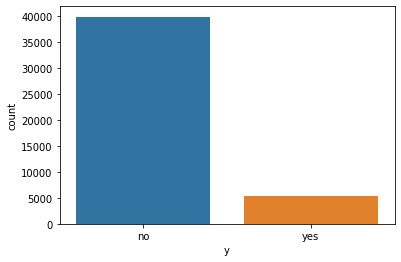

In [22]:
sns.countplot(x='y',data=data)

In [23]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [24]:
# heavily imbalanced dataset

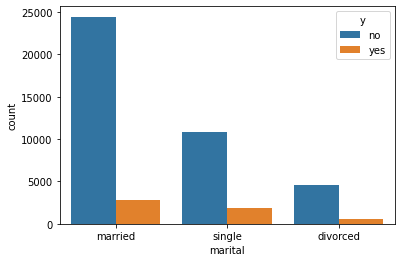

In [25]:
sns.countplot(x='marital',hue='y',data=data)

In [26]:
pd.crosstab(data.marital,data.y)

y,no,yes
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


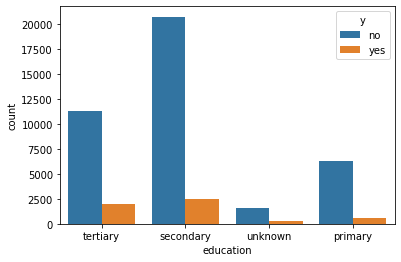

In [27]:
sns.countplot(x='education',hue='y',data=data)

In [28]:
pd.crosstab(data.education,data.y)

y,no,yes
education,,
primary,6260,591
secondary,20752,2450
tertiary,11305,1996
unknown,1605,252


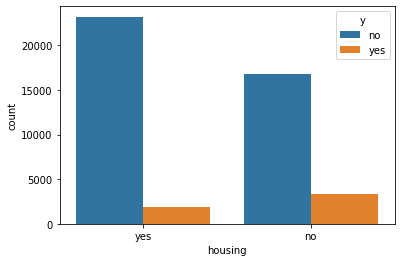

In [29]:
sns.countplot(x='housing',hue='y',data=data,)

In [30]:
pd.crosstab(data.housing,data.y)

y,no,yes
housing,,
no,16727,3354
yes,23195,1935


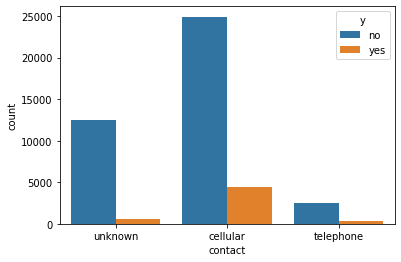

In [31]:
sns.countplot(x='contact',hue='y',data=data)

In [32]:
pd.crosstab(data.contact,data.y)

y,no,yes
contact,,
cellular,24916,4369
telephone,2516,390
unknown,12490,530


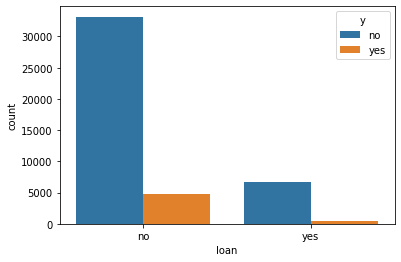

In [33]:
sns.countplot(x='loan',hue='y',data=data)

In [34]:
pd.crosstab(data.loan,data.y)

y,no,yes
loan,,
no,33162,4805
yes,6760,484


In [35]:
data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [36]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [37]:
data['y']=data['y'].map({'no':0,'yes':1})

In [38]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [39]:
# split dataset to numerical and categorical columns

In [40]:
num=data.select_dtypes(include=['int64']).drop(columns=['y'])
cat=data.select_dtypes(include=['object'])

In [41]:
cat

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown
45208,retired,married,secondary,no,no,no,cellular,nov,success
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown


In [42]:
# before one hot encoding lets see the variance of each feature

In [43]:
cat.nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64

In [44]:
# max varianve is 12 so we can carry on

In [45]:
dummies=pd.get_dummies(cat,drop_first=True)

In [46]:
dummies

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
45207,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [47]:
# lets see the numerical dataset

In [48]:
num

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [49]:
# we need to rescale 

In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(num)
scaled_num=sc.transform(num)


In [51]:
scaled_num

array([[ 1.60696496,  0.25641925, -1.29847633, ..., -0.56935064,
        -0.41145311, -0.25194037],
       [ 0.28852927, -0.43789469, -1.29847633, ..., -0.56935064,
        -0.41145311, -0.25194037],
       [-0.74738448, -0.44676247, -1.29847633, ..., -0.56935064,
        -0.41145311, -0.25194037],
       ...,
       [ 2.92540065,  1.42959305,  0.14341818, ...,  0.72181052,
         1.43618859,  1.05047333],
       [ 1.51279098, -0.22802402,  0.14341818, ...,  0.39902023,
        -0.41145311, -0.25194037],
       [-0.37068857,  0.52836436,  0.14341818, ..., -0.24656035,
         1.4761376 ,  4.52357654]])

In [52]:
scaled=pd.DataFrame(scaled_num,columns=num.columns)

In [53]:
scaled

,age,balance,day,duration,campaign,pdays,previous
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940
...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940
45208,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940


In [54]:
# merge both together

In [55]:
dataset=pd.concat([scaled,dummies],axis=1)

In [56]:
dataset

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473,0,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [57]:
#add the target feature to dataset

In [58]:
dataset['y']=data['y']

In [59]:
dataset

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45208,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473,0,0,0,...,0,0,0,1,0,0,0,1,0,1
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [79]:
dataset.to_csv('nation.csv')

In [60]:
# check correlation

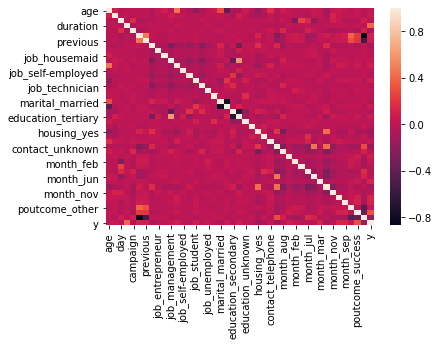

In [60]:
sns.heatmap(dataset.corr())

In [62]:
# we have 43 features, lets perform PCA to reduce

In [63]:
# lets split the data set

In [61]:
X=dataset.drop(columns=['y'])
y=dataset['y']

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [132]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [133]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
ypred=rf.predict(x_test)

In [68]:
pd.crosstab(ypred,y_test, rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,7836,649
1,187,371


# before applying smote sample size 9043

In [112]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [111]:
generate_model_report(y_test,ypred)

Accuracy =  0.90755280327325
Precision =  0.6648745519713262
Recall =  0.3637254901960784
F1 Score =  0.47021546261089986
cm= [[7836  187]
 [ 649  371]]


In [84]:
#SMOTE

In [85]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


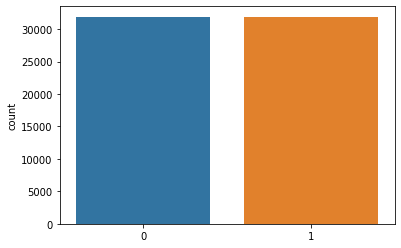

In [88]:
sns.countplot(x=y_train_res,data=df)

In [89]:
rf.fit(x_train_res,y_train_res)
y_pred=rf.predict(x_test)

In [113]:
pd.crosstab(y_pred,y_test)

y,0,1
row_0,,
0,7618,453
1,405,567


# After applying smote sample size 9043

In [92]:
generate_model_report(y_test,y_pred)

Accuracy =  0.9051199823067566
Precision =  0.5833333333333334
Recall =  0.5558823529411765
F1 Score =  0.569277108433735


In [93]:
weights = np.linspace(0.005, 0.25,0.75,2.5, 10)
weights

C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


(array([], dtype=float64), nan)

C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The specified ratio required to remove samples from the minority class while trying to generate new samples. Please increase the ratio.

  FitFailedWarning)
C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The specified ratio required to remove samples from the minority class while trying to generate new samples. Please increase the ratio.

  FitFailedWarning)
C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The s

C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The specified ratio required to remove samples from the minority class while trying to generate new samples. Please increase the ratio.

  FitFailedWarning)
C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The specified ratio required to remove samples from the minority class while trying to generate new samples. Please increase the ratio.

  FitFailedWarning)
C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The s

C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_in

C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_in

Best parameters : {'smote__ratio': 0.25}


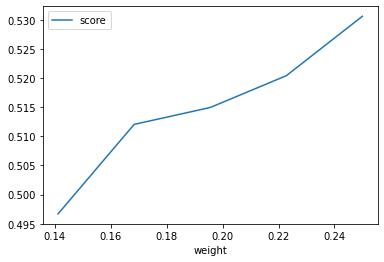

In [95]:
pipe = make_pipeline(
    SMOTE(),
    RandomForestClassifier()
)

weights = np.linspace(0.005, 0.25, 10)

gsc = GridSearchCV(
    estimator=pipe,
    param_grid={
        'smote__ratio': weights
    },
    scoring='f1',
    cv=10
)
grid_result = gsc.fit(x_train, y_train)

print("Best parameters : %s" % grid_result.best_params_)
weight_f1_score_df = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                                   'weight': weights })
weight_f1_score_df.plot(x='weight')

In [96]:
pipe = make_pipeline(
    SMOTE(ratio=0.25),
    RandomForestClassifier()
)

pipe.fit(x_train, y_train)

Y_Test_Pred = pipe.predict(x_test)

C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [98]:
pd.crosstab(Y_Test_Pred, y_test, rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,7748,528
1,275,492


In [99]:
generate_model_report(y_test,Y_Test_Pred)

Accuracy =  0.9112020347229901
Precision =  0.6414602346805737
Recall =  0.4823529411764706
F1 Score =  0.5506435366536094


In [118]:
y_smote=pd.DataFrame(y_train_res)

In [120]:
y_smote.count()

0    63798
dtype: int64

In [121]:
data['y'].count()

45211

In [128]:
x_smote=pd.DataFrame(x_train_res)

In [130]:
x_smote.count()

0     63798
1     63798
2     63798
3     63798
4     63798
5     63798
6     63798
7     63798
8     63798
9     63798
10    63798
11    63798
12    63798
13    63798
14    63798
15    63798
16    63798
17    63798
18    63798
19    63798
20    63798
21    63798
22    63798
23    63798
24    63798
25    63798
26    63798
27    63798
28    63798
29    63798
30    63798
31    63798
32    63798
33    63798
34    63798
35    63798
36    63798
37    63798
38    63798
39    63798
40    63798
41    63798
dtype: int64